In [11]:
import pandas as pd
def rescale_ts(ts):
    df = pd.DataFrame(ts)
    df_norm = (df - df.mean()) / (df.max() - df.min())
    ts_norm = df_norm.as_matrix()
    return ts_norm

In [45]:
data_path = "/home/roseyu/Data/TensorRNN/"
data_set = "traffic"
file_name = data_set+".pkl"
import pickle
with open(data_path+file_name, 'rb')as fstream:
          dat = pickle.load(fstream)
print(dat.shape)
print(type(dat))

(35136, 9)
<type 'numpy.ndarray'>


### rescale and save

In [ ]:
dat = rescale_ts(dat)

import numpy as np
np.save(data_path+data_set, dat)

In [23]:
import pandas as pd
df = pd.DataFrame(dat)
df.describe()

,0,1,2,3,4,5,6,7,8
count,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000
mean,50.508417,50.503683,58.170064,46.553948,55.185665,57.673351,61.445361,60.170434,53.350660
std,22.002591,21.186229,17.198190,23.509789,15.795010,17.010578,18.623338,20.562127,21.738019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,35.375000,61.333333,32.555556,55.625000,61.250000,66.000000,65.333333,44.870536
50%,59.375000,61.875000,64.444444,57.375000,59.750000,63.444444,67.500000,67.555556,65.375000
75%,64.000000,64.750000,66.500000,62.857143,62.875000,64.777778,68.428571,68.714286,68.111111
max,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


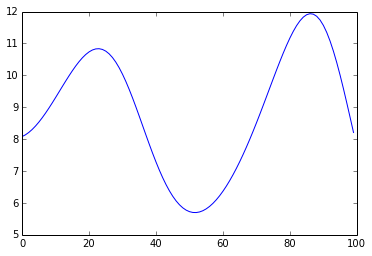

In [47]:
y_true, y_pred =pred
plt.plot(y_true[100:200,seq_id])

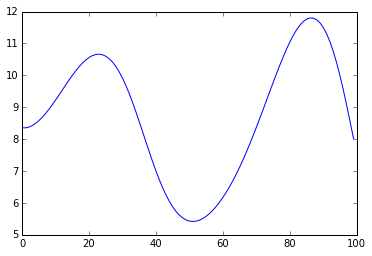

In [48]:
plt.plot(y_pred[100:200,seq_id])

### visualize lorenz input

data_shape: (5000, 3)
[2201 2043 2882   49 3168  333 2429 2175 1779 2645]


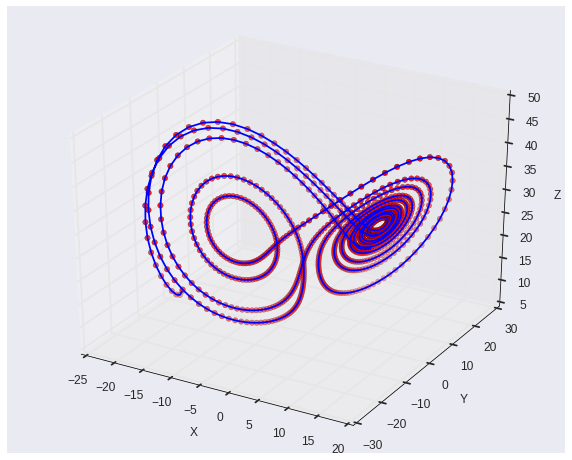

In [14]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


params = {
   'axes.labelsize': 12,
   'text.fontsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
mpl.rcParams.update(params)

data_mat = dat[:,0:3]


print("data_shape:"), np.shape(data_mat)
N = 10
xs = data_mat[:,0]
ys = data_mat[:,1]
zs = data_mat[:,2]
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

def mm(x):
    return np.min(x)-10, np.max(x)+10

idxs = np.random.choice(range(data_mat.shape[0]), N)
print(idxs)
T= 1000

ax.plot(data_mat[:T,0], data_mat[:T,1], data_mat[:T,2], 'b')
ax.scatter(data_mat[:T,0], data_mat[:T,1], data_mat[:T,2], c='r', s=30)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# ax.set_xlim(*mm(xs))
# ax.set_ylim(*mm(ys))
# ax.set_zlim(*mm(zs))
# fig.savefig('lorenz.png')

### visualize traffic series

In [46]:
data_path = "/home/roseyu/Data/LA_Traffic/"
data_set = "df_highway_2012_4mon"
file_name = data_set+".pkl"
import pickle
with open(data_path+file_name, 'rb')as fstream:
          dat_cmplt = pickle.load(fstream)
print(dat_cmplt.index)


DatetimeIndex(['2012-03-01 00:00:00', '2012-03-01 00:05:00',
               '2012-03-01 00:10:00', '2012-03-01 00:15:00',
               '2012-03-01 00:20:00', '2012-03-01 00:25:00',
               '2012-03-01 00:30:00', '2012-03-01 00:35:00',
               '2012-03-01 00:40:00', '2012-03-01 00:45:00',
               ...
               '2012-06-30 23:10:00', '2012-06-30 23:15:00',
               '2012-06-30 23:20:00', '2012-06-30 23:25:00',
               '2012-06-30 23:30:00', '2012-06-30 23:35:00',
               '2012-06-30 23:40:00', '2012-06-30 23:45:00',
               '2012-06-30 23:50:00', '2012-06-30 23:55:00'],
              dtype='datetime64[ns]', length=35136, freq='5T')


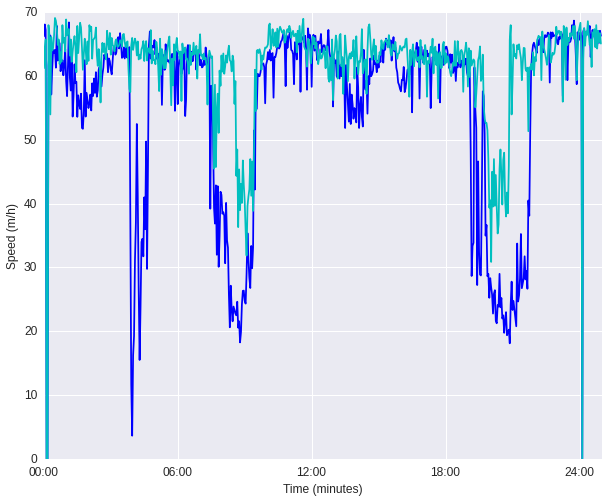

In [62]:
import matplotlib.ticker as ticker

params = {
   'axes.labelsize': 20,
   'text.fontsize': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

data_mat = dat
T = 600
ax.plot(data_mat[:T,1], 'b')
# ax.plot(data_mat[:T,1], 'c')
ax.plot(data_mat[:T,2], 'c')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Speed (m/h)")


x = len(data_mat)
tick_spacing = 144
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks([0,144, 288, 432, 576 ], ['00:00','06:00','12:00','18:00', '24:00'])

fig.savefig('traffic.png')